# 特征分解
:label:`sec_eigendecompositions`

特征值通常是我们在线性代数学习中遇到的最有用的概念之一，然而，作为初学者，很容易忽视其重要性。下面，我们将介绍特征分解，并尝试传达为什么它如此重要的某些感觉。

假设我们有一个矩阵 $A$，其元素如下：

$$
\mathbf{A} = \begin{bmatrix}
2 & 0 \\
0 & -1
\end{bmatrix}.
$$

如果我们对任何向量 $\mathbf{v} = [x, y]^\top$ 应用 $A$，我们得到一个向量 $\mathbf{A}\mathbf{v} = [2x, -y]^\top$。这有一个直观的解释：在 $x$ 方向上将向量拉伸为原来的两倍，然后在 $y$ 方向上翻转。

然而，有些向量保持不变。即 $[1, 0]^\top$ 变为 $[2, 0]^\top$，而 $[0, 1]^\top$ 变为 $[0, -1]^\top$。这些向量仍然在同一条线上，唯一的改变是矩阵将它们分别拉伸了 $2$ 倍和 $-1$ 倍。我们称这样的向量为*特征向量*，拉伸因子称为*特征值*。

一般来说，如果我们可以找到一个数 $\lambda$ 和一个向量 $\mathbf{v}$ 使得

$$
\mathbf{A}\mathbf{v} = \lambda \mathbf{v}.
$$

我们说 $\mathbf{v}$ 是 $A$ 的特征向量，$\lambda$ 是特征值。

## 寻找特征值
让我们弄清楚如何找到它们。通过从两边减去 $\lambda \mathbf{v}$，然后提取出向量，我们看到上述等价于：

$$(\mathbf{A} - \lambda \mathbf{I})\mathbf{v} = 0.$$
:eqlabel:`eq_eigvalue_der`

对于 :eqref:`eq_eigvalue_der` 发生的情况，我们看到 $(\mathbf{A} - \lambda \mathbf{I})$ 必须将某个方向压缩到零，因此它是不可逆的，从而行列式为零。因此，我们可以通过找到使 $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$ 成立的 $\lambda$ 来找到*特征值*。一旦找到特征值，我们就可以解 $\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ 来找到相关的*特征向量*。

### 一个例子
让我们用一个更具挑战性的矩阵来看一下

$$
\mathbf{A} = \begin{bmatrix}
2 & 1\\
2 & 3
\end{bmatrix}.
$$

如果我们考虑 $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$，我们看到这等价于多项式方程 $0 = (2-\lambda)(3-\lambda)-2 = (4-\lambda)(1-\lambda)$。因此，两个特征值是 $4$ 和 $1$。为了找到相关联的向量，我们需要解

$$
\begin{bmatrix}
2 & 1\\
2 & 3
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}x \\ y\end{bmatrix}  \; \textrm{和} \;
\begin{bmatrix}
2 & 1\\
2 & 3
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix}  = \begin{bmatrix}4x \\ 4y\end{bmatrix} .
$$

我们可以分别用向量 $[1, -1]^\top$ 和 $[1, 2]^\top$ 解决这个问题。

我们可以使用内置的 `numpy.linalg.eig` 函数在代码中检查这一点。

In [1]:
%matplotlib inline
import torch
from IPython import display
from d2l import torch as d2l

torch.linalg.eig(torch.tensor([[2, 1], [2, 3]], dtype=torch.float64))

torch.return_types.linalg_eig(
eigenvalues=tensor([1.+0.j, 4.+0.j], dtype=torch.complex128),
eigenvectors=tensor([[-0.7071+0.j, -0.4472+0.j],
        [ 0.7071+0.j, -0.8944+0.j]], dtype=torch.complex128))

请注意，`numpy`将特征向量标准化为长度为1，
而我们则取任意长度的特征向量。
此外，符号的选择是任意的。
但是，计算出的向量与我们手动找到的具有相同特征值的向量平行。

## 矩阵分解
让我们继续上一个例子再进一步。令

$$
\mathbf{W} = \begin{bmatrix}
1 & 1 \\
-1 & 2
\end{bmatrix},
$$

为矩阵$\mathbf{A}$的特征向量作为列的矩阵。令

$$
\boldsymbol{\Sigma} = \begin{bmatrix}
1 & 0 \\
0 & 4
\end{bmatrix},
$$

为对角线上有相应特征值的矩阵。
那么，特征值和特征向量的定义告诉我们

$$
\mathbf{A}\mathbf{W} =\mathbf{W} \boldsymbol{\Sigma} .
$$

矩阵$W$是可逆的，因此我们可以在两边右乘$W^{-1}$，
可以看到我们可以写成

$$\mathbf{A} = \mathbf{W} \boldsymbol{\Sigma} \mathbf{W}^{-1}.$$
:eqlabel:`eq_eig_decomp`

在下一节中我们将看到这一结果的一些很好的应用，
但目前我们只需要知道只要能找到一组完整的线性无关的特征向量（这样$W$就是可逆的），这样的分解就会存在。

## 特征分解上的运算
关于特征分解 :eqref:`eq_eig_decomp`的一个好处是，
我们可以简洁地用特征分解来表达我们通常遇到的许多操作。首先举个例子：

$$
\mathbf{A}^n = \overbrace{\mathbf{A}\cdots \mathbf{A}}^{\textrm{$n$ 次}} = \overbrace{(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})\cdots(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})}^{\textrm{$n$ 次}} =  \mathbf{W}\overbrace{\boldsymbol{\Sigma}\cdots\boldsymbol{\Sigma}}^{\textrm{$n$ 次}}\mathbf{W}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^n \mathbf{W}^{-1}.
$$

这告诉我们，对于任何正幂次的矩阵，
通过将特征值提升到相同的幂次即可得到特征分解。
同样的方法也适用于负幂次，
因此如果我们想要求矩阵的逆，只需考虑

$$
\mathbf{A}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^{-1} \mathbf{W}^{-1},
$$

换句话说，只需要将每个特征值求逆。
这只有在每个特征值都不为零时才有效，
因此我们看到可逆等价于没有零特征值。

事实上，进一步的工作可以表明如果$\lambda_1, \ldots, \lambda_n$
是一个矩阵的特征值，那么该矩阵的行列式为

$$
\det(\mathbf{A}) = \lambda_1 \cdots \lambda_n,
$$

即所有特征值的乘积。
从直觉上讲这是合理的，因为无论$\mathbf{W}$做了什么样的拉伸，
$W^{-1}$都会将其撤销，所以最终发生的唯一拉伸
是由对角矩阵$\boldsymbol{\Sigma}$进行的，它按照对角元素的乘积来拉伸体积。

最后，回想一下秩是指矩阵中最大数量的线性无关列。
仔细检查特征分解后，我们可以看到秩与
$\mathbf{A}$的非零特征值的数量相同。

例子还可以继续，但希望要点已经明确：
特征分解可以简化许多线性代数计算，并且是许多数值算法的基础操作
以及我们在线性代数中所做的大量分析。

## 对称矩阵的特征分解
并不总是能够找到足够多的线性无关特征向量
以使上述过程工作。例如矩阵

$$
\mathbf{A} = \begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix},
$$

只有一个特征向量，即$(1, 0)^\top$。
要处理此类矩阵，我们需要比这里能覆盖的更高级的技术
（如Jordan标准型或奇异值分解）。
我们经常需要将注意力限制在那些可以保证存在完整特征向量集的矩阵上。

最常见的一类是对称矩阵，
这些矩阵满足$\mathbf{A} = \mathbf{A}^\top$。
在这种情况下，我们可以取$W$为正交矩阵——其列都是长度为一的相互垂直的向量，其中
$\mathbf{W}^\top = \mathbf{W}^{-1}$——并且所有的特征值都是实数。
因此，在这种特殊情况下，我们可以将 :eqref:`eq_eig_decomp` 写作

$$
\mathbf{A} = \mathbf{W}\boldsymbol{\Sigma}\mathbf{W}^\top .
$$

## 盖尔圆定理
特征值往往很难直观地理解。
如果给出一个任意矩阵，不经过计算很难说清楚
它的特征值是什么。然而，有一个定理可以使
如果最大的值位于对角线上，则容易很好地近似。

设$\mathbf{A} = (a_{ij})$为任意方阵（$n\times n$）。
我们将定义$r_i = \sum_{j \neq i} |a_{ij}|$。
让$\mathcal{D}_i$表示复平面上以$a_{ii}$为中心、半径为$r_i$的圆盘。
那么，$\mathbf{A}$的每一个特征值都包含在其中一个$\mathcal{D}_i$中。

这可能有点难以理解，所以我们来看一个例子。
考虑矩阵：

$$
\mathbf{A} = \begin{bmatrix}
1.0 & 0.1 & 0.1 & 0.1 \\
0.1 & 3.0 & 0.2 & 0.3 \\
0.1 & 0.2 & 5.0 & 0.5 \\
0.1 & 0.3 & 0.5 & 9.0
\end{bmatrix}.
$$

我们有$r_1 = 0.3$，$r_2 = 0.6$，$r_3 = 0.8$ 和 $r_4 = 0.9$。
矩阵是对称的，因此所有特征值都是实数。
这意味着我们的所有特征值都将位于以下范围之一内：

$$[a_{11}-r_1, a_{11}+r_1] = [0.7, 1.3], $$

$$[a_{22}-r_2, a_{22}+r_2] = [2.4, 3.6], $$

$$[a_{33}-r_3, a_{33}+r_3] = [4.2, 5.8], $$

$$[a_{44}-r_4, a_{44}+r_4] = [8.1, 9.9]. $$


进行数值计算显示
特征值大约为$0.99$，$2.97$，$4.95$，$9.08$，
全部舒适地位于提供的范围内。

In [2]:
A = torch.tensor([[1.0, 0.1, 0.1, 0.1],
              [0.1, 3.0, 0.2, 0.3],
              [0.1, 0.2, 5.0, 0.5],
              [0.1, 0.3, 0.5, 9.0]])

v, _ = torch.linalg.eig(A)
v

tensor([0.9923+0.j, 9.0803+0.j, 4.9539+0.j, 2.9734+0.j])

通过这种方式，可以近似计算特征值，
并且在对角线元素远大于其他所有元素的情况下，
这些近似值将相当准确。

这虽然是一个小细节，但对于像特征分解这样
复杂且微妙的话题来说，任何直观的理解都是有益的。

## 一个有用的应用：迭代映射的增长

现在我们已经从原则上理解了特征向量是什么，
让我们看看它们如何提供对神经网络行为中的一个核心问题——合适的权重初始化——的深入理解。

### 特征向量作为长期行为

对于深度神经网络初始化的完整数学研究超出了本文的范围，
但我们可以在这里看到一个简化版本来理解
特征值如何帮助我们了解这些模型的工作方式。
我们知道，神经网络通过在线性变换层之间插入非线性操作来运行。
为了简单起见，这里假设没有非线性，
并且变换是一个重复的矩阵运算 $A$，
因此我们模型的输出是

$$
\mathbf{v}_{out} = \mathbf{A}\cdot \mathbf{A}\cdots \mathbf{A} \mathbf{v}_{in} = \mathbf{A}^N \mathbf{v}_{in}.
$$

当这些模型被初始化时，$A$ 被取为具有高斯分布条目的随机矩阵，
所以让我们创建这样一个矩阵。具体来说，我们从均值为零、方差为一的高斯分布中生成一个 $5 \times 5$ 矩阵。

In [3]:
torch.manual_seed(42)

k = 5
A = torch.randn(k, k, dtype=torch.float64)
A

tensor([[ 0.2996,  0.2424,  0.2832, -0.2329,  0.6712],
        [ 0.7818, -1.7903, -1.7484,  0.1735, -0.1182],
        [-1.7446, -0.4695,  0.4573,  0.5177, -0.2771],
        [-0.6641,  0.6551,  0.2616, -1.5265, -0.3311],
        [-0.6378,  0.1072,  0.7096,  0.3009, -0.2869]], dtype=torch.float64)

### 在随机数据上的行为
为了简化我们的玩具模型，
我们将假设我们输入的数据向量 $\mathbf{v}_{in}$
是一个随机的五维高斯向量。
让我们思考一下我们希望发生的情况。
作为背景，让我们考虑一个通用的机器学习问题，
其中我们试图将输入数据（如图像）转换为预测结果，
比如图像是猫的概率。
如果反复应用 $\mathbf{A}$
会将随机向量拉伸得很长，
那么输入的小变化会被放大
成输出的大变化---输入图像的微小修改
会导致截然不同的预测结果。
这似乎不太对！

另一方面，如果 $\mathbf{A}$ 将随机向量压缩得更短，
那么经过多层处理后，向量基本上会缩到几乎没有，
并且输出将不再依赖于输入。这也显然是不对的！

我们需要在增长和衰减之间走一条狭窄的道路，
以确保我们的输出根据输入发生变化，但变化不要太大！

让我们看看当我们反复用矩阵 $\mathbf{A}$
乘以一个随机输入向量，并跟踪其范数时会发生什么。

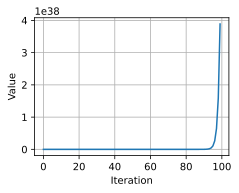

In [4]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

规范正在失控地增长！
确实，如果我们查看商的列表，我们会看到一种模式。

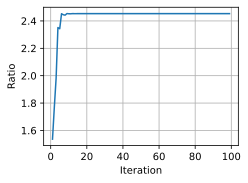

In [5]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

如果看上述计算的最后一部分，
我们会发现随机向量被放大了`1.974459321485[...]`倍，
其中末尾的部分会稍微变动，
但放大的倍数是稳定的。

### 回到特征向量

我们已经看到特征向量和特征值对应于某个东西被放大的程度，
但这仅适用于特定的向量和特定的放大。
让我们来看看对于$\mathbf{A}$它们是什么。
这里有一点需要注意：结果表明，为了看到所有的特征值和特征向量，
我们需要用到复数。
你可以将这些理解为拉伸和旋转。
通过取复数的模（实部和虚部平方和的平方根）
我们可以测量这个拉伸的程度。我们也对它们进行排序。

In [6]:
# Compute the eigenvalues
eigs = torch.linalg.eig(A).eigenvalues.tolist()
norm_eigs = [torch.abs(torch.tensor(x)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [tensor(0.3490), tensor(1.1296), tensor(1.1296), tensor(1.1828), tensor(2.4532)]


### 一个观察

我们在这里看到了一些有点意外的情况：
之前我们确定的矩阵 $\mathbf{A}$ 长期拉伸随机向量的数值 *恰好*（精确到小数点后十三位！）是 $\mathbf{A}$ 的最大特征值。
这显然不是巧合！

但是，如果我们现在从几何角度来考虑发生了什么，
这就开始说得通了。考虑一个随机向量。
这个随机向量指向每一个方向，
因此特别是它至少有一点指向与 $\mathbf{A}$ 的最大特征值相关的特征向量的方向。
这一点非常重要，以至于被称为 *主特征值* 和 *主特征向量*。
在应用 $\mathbf{A}$ 之后，我们的随机向量
在每一个可能的方向上被拉伸，
与每一个可能的特征向量相关联，
但它在与这个主特征向量相关的方向上被拉伸得最多。
这意味着，在应用 $A$ 之后，
我们的随机向量变得更长，并且指向更接近于与主特征向量对齐的方向。
经过多次应用矩阵后，
与主特征向量的对齐变得越来越紧密，直到实际上，
我们的随机向量已经被转换成了主特征向量！
实际上，这个算法是所谓的 *幂迭代* 的基础，
用于找到矩阵的最大特征值和特征向量。详情请参见，例如，:cite:`Golub.Van-Loan.1996`。

### 修正归一化

现在，从上面的讨论中，我们得出结论
我们不希望随机向量被拉伸或压缩，
我们希望随机向量在整个过程中保持大致相同的大小。
为此，我们现在通过这个主特征值重新缩放我们的矩阵，
使得最大的特征值现在变成了一。
让我们看看在这种情况下会发生什么。

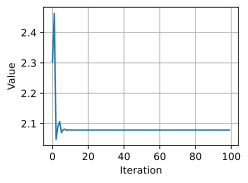

In [7]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

我们也可以像之前那样绘制连续范数之间的比率，并观察其确实稳定了下来。

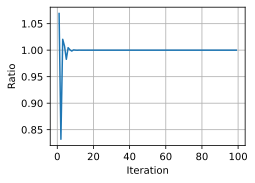

In [8]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

## 讨论

我们现在看到了我们所希望的结果！
在通过主特征值对矩阵进行归一化之后，
我们发现随机数据不再像之前那样爆炸性增长，
而是最终趋于一个特定的值。
如果能够从基本原理出发做到这一点将会很好，
事实证明，如果我们深入研究其中的数学，
可以看到具有独立均值为零、方差为一的高斯元素的大随机矩阵的最大特征值平均约为 $\sqrt{n}$，
或者在我们的情况下约为 $\sqrt{5} \approx 2.2$，
这是由于一个称为*圆定律*的有趣事实 :cite:`Ginibre.1965`。
随机矩阵的特征值（以及一个相关对象称为奇异值）之间的关系已被证明与神经网络的正确初始化有着深刻的联系，正如 :citet:`Pennington.Schoenholz.Ganguli.2017` 和后续工作中讨论的那样。

## 总结
* 特征向量是被矩阵拉伸但方向不变的向量。
* 特征值是特征向量被矩阵作用后拉伸的程度。
* 矩阵的特征分解可以将许多操作简化为对特征值的操作。
* 盖尔圆定理可以提供矩阵特征值的近似值。
* 迭代矩阵幂的行为主要取决于最大特征值的大小。这种理解在神经网络初始化理论中有许多应用。

## 练习
1. 下列矩阵的特征值和特征向量是什么？
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}?
$$
1. 下列矩阵的特征值和特征向量是什么？这个例子与前一个相比有什么奇怪之处？
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
0 & 2
\end{bmatrix}.
$$
1. 不计算特征值，是否有可能下列矩阵的最小特征值小于 $0.5$？*注意*：这个问题可以在头脑中完成。
$$
\mathbf{A} = \begin{bmatrix}
3.0 & 0.1 & 0.3 & 1.0 \\
0.1 & 1.0 & 0.1 & 0.2 \\
0.3 & 0.1 & 5.0 & 0.0 \\
1.0 & 0.2 & 0.0 & 1.8
\end{bmatrix}.
$$

[讨论](https://discuss.d2l.ai/t/1086)